### import libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from data_transformation import txt_to_csv
input_data = "../Data/MachineLearningRating_v3.txt"
output_data = "../Data/MachineLearningRating_v3.csv"

# Convert a tab-separated TXT file to a CSV file
txt_to_csv(input_data, output_data, delimiter='\t', header=True)


Successfully converted '../Data/MachineLearningRating_v3.txt' to '../Data/MachineLearningRating_v3.csv'


## Data Understanding

In [4]:
#data cleaning
from data_cleaning import clean_csv
file_path=output_data
output_path = "../Data/cleaned.csv"

clean_csv(file_path,output_path)



Initial DataFrame:
  UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims
0  145249|12827|2015-03-01 00:00:00|True|  |Close...                                                                                                                                                                                                                                                                                          

### load data

In [5]:
df = pd.read_csv("../Data/cleaned.csv")

In [6]:
# Load your DataFrame with the correct delimiter
df = pd.read_csv("../Data/cleaned.csv", sep='|')

# Now check the columns again
print(df.columns.tolist())

C:\Users\hp\AppData\Local\Temp\ipykernel_17732\3067410370.py:2: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/cleaned.csv", sep='|')


['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


### Review the Data Structure

In [7]:
print(df.head())

  UnderwrittenCoverID  PolicyID     TransactionMonth IsVATRegistered  \
0              145249   12827.0  2015-03-01 00:00:00            True   
1              145249   12827.0  2015-05-01 00:00:00            True   
2              145249   12827.0  2015-07-01 00:00:00            True   
3              145255   12827.0  2015-05-01 00:00:00            True   
4              145255   12827.0  2015-07-01 00:00:00            True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Windscreen  

In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  object 
 1   PolicyID                  973382 non-null   float64
 2   TransactionMonth          973382 non-null   object 
 3   IsVATRegistered           973382 non-null   object 
 4   Citizenship               973382 non-null   object 
 5   LegalType                 973382 non-null   object 
 6   Title                     973382 non-null   object 
 7   Language                  973382 non-null   object 
 8   Bank                      831862 non-null   object 
 9   AccountType               934647 non-null   object 
 10  MaritalStatus             965123 non-null   object 
 11  Gender                    963846 non-null   object 
 12  Country                   973382 non-null   object 
 13  Province                  9

In [9]:
print(df.describe())

            PolicyID     PostalCode        mmcode  RegistrationYear  \
count  973382.000000  973382.000000  9.728300e+05     973382.000000   
mean     7891.596664    2948.950155  5.479908e+07       2010.189761   
std      5292.157633    2646.084789  1.370179e+07          3.261043   
min        14.000000       1.000000  4.041200e+06       1987.000000   
25%      4414.000000     700.000000  6.005692e+07       2008.000000   
50%      7033.000000    2000.000000  6.005842e+07       2011.000000   
75%     11008.000000    4093.000000  6.005842e+07       2013.000000   
max     23246.000000    9870.000000  6.506535e+07       2015.000000   

           Cylinders  cubiccapacity      kilowatts  NumberOfDoors  \
count  972830.000000  972830.000000  972830.000000  972830.000000   
mean        4.047416    2467.546929      97.316719       4.016624   
std         0.296717     443.962832      19.410540       0.469113   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.0

## Data Summarization

### Descriptive Statistics

In [10]:
numerical_summary = df[['TotalPremium', 'TotalClaims']].describe()
print(numerical_summary)

        TotalPremium    TotalClaims
count  973382.000000  973382.000000
mean       61.737566      65.583857
std       231.722484    2390.027959
min      -782.576754  -12002.412281
25%         0.000000       0.000000
50%         2.175614       0.000000
75%        21.929825       0.000000
max     65282.603421  393092.105263


In [11]:
#Check Data Types
print(df.dtypes)  

UnderwrittenCoverID          object
PolicyID                    float64
TransactionMonth             object
IsVATRegistered              object
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                  float64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear            float64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [12]:
# Data Quality Assessment
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
   


PolicyID                      26716
TransactionMonth              26716
IsVATRegistered               26716
Citizenship                   26716
LegalType                     26716
Title                         26716
Language                      26716
Bank                         168236
AccountType                   65451
MaritalStatus                 34975
Gender                        36252
Country                       26716
Province                      26716
PostalCode                    26716
MainCrestaZone                26716
SubCrestaZone                 26716
ItemType                      26716
mmcode                        27268
VehicleType                   27268
RegistrationYear              26716
make                          27268
Model                         27268
Cylinders                     27268
cubiccapacity                 27268
kilowatts                     27268
bodytype                      27268
NumberOfDoors                 27268
VehicleIntroDate            

## Univariate Analysis

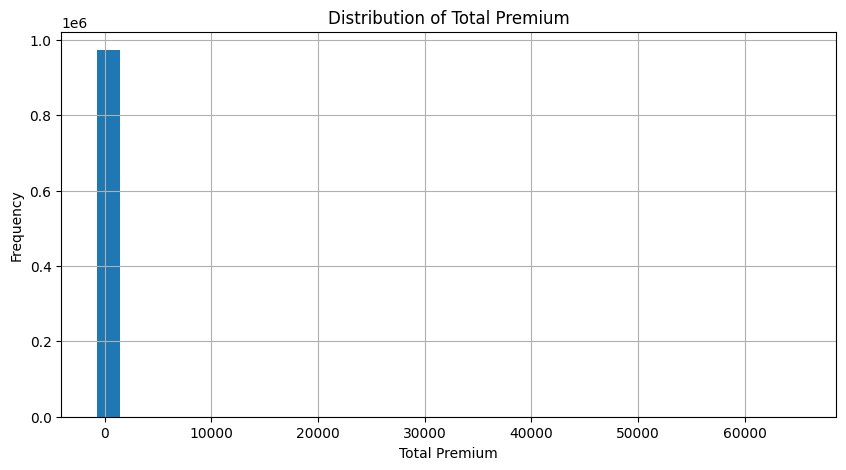

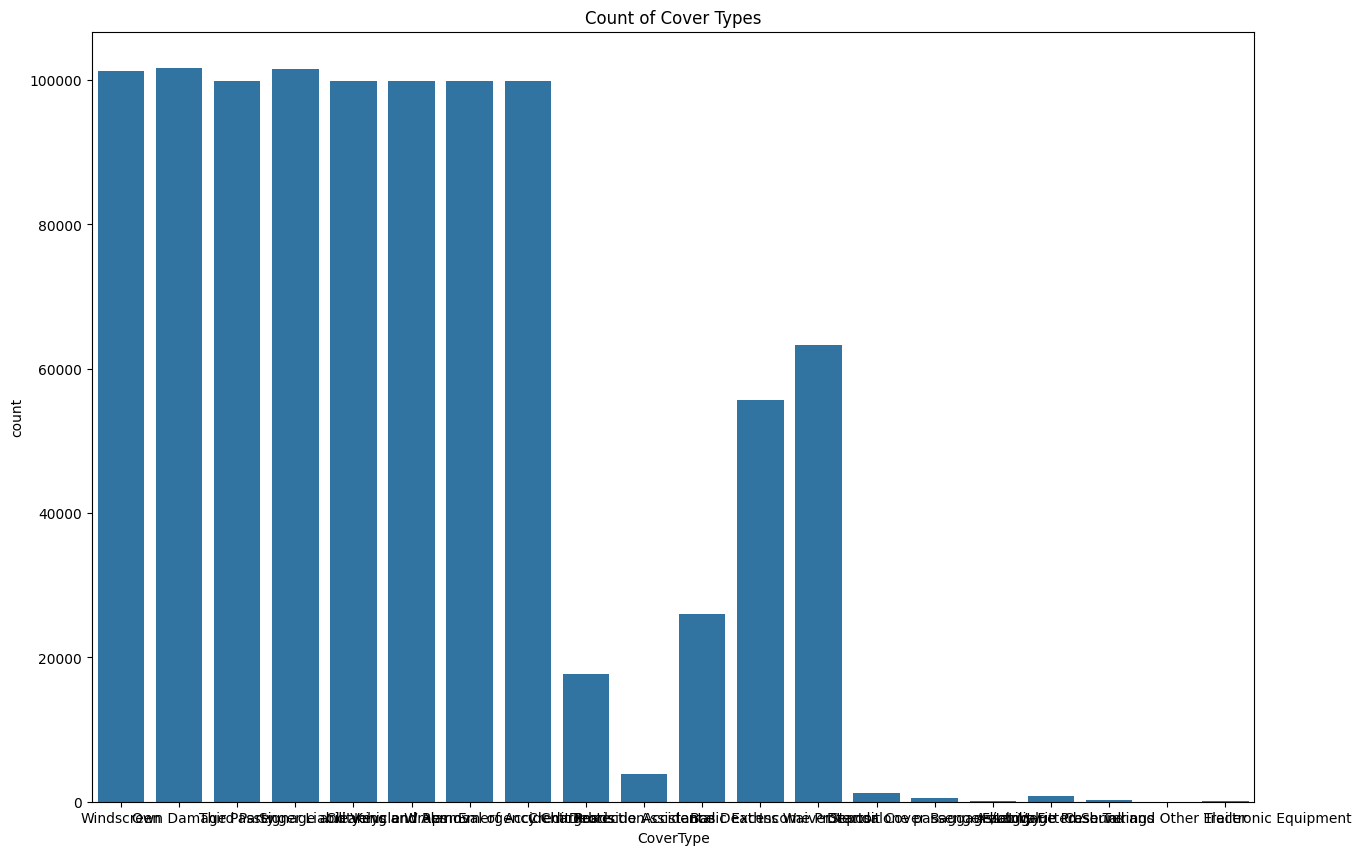

In [13]:
from data_visualization import plot_total_premium_distribution,plot_cover_type_count

plot_total_premium_distribution(df)

plot_cover_type_count(df)
   


##  Bivariate or Multivariate Analysis
1.  Explore Relationships:

   • Scatter plot for TotalPremium and TotalClaims.

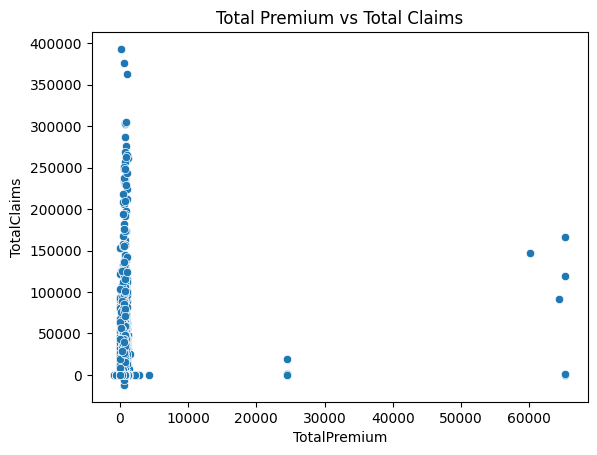

In [14]:
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df)
plt.title('Total Premium vs Total Claims')
plt.show()




In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()
   

##  Data Comparison
1. Trends Over Geography:

   • Group by ZipCode or Province and analyze trends.

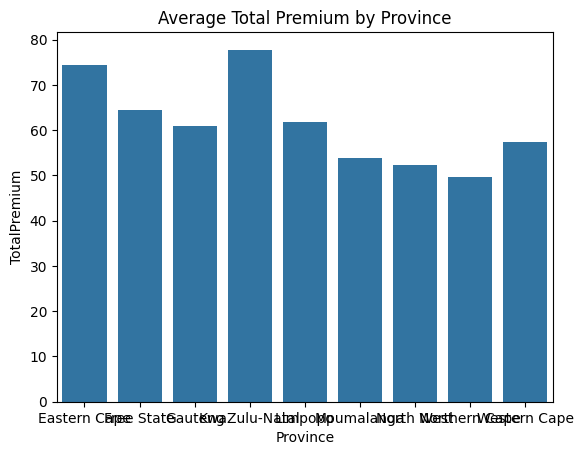

In [25]:
geo_trends = df.groupby('Province').agg({'TotalPremium': 'mean', 'TotalClaims': 'mean'}).reset_index()
sns.barplot(x='Province', y='TotalPremium', data=geo_trends)
plt.title('Average Total Premium by Province')
plt.show()
   


## Outlier Detection

1. Use Box Plots:

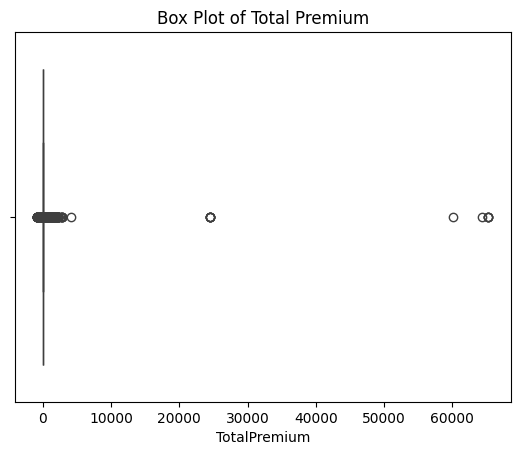

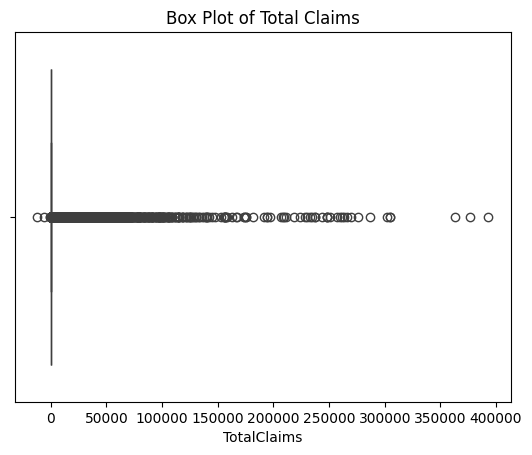

In [26]:
sns.boxplot(x=df['TotalPremium'])
plt.title('Box Plot of Total Premium')
plt.show()

sns.boxplot(x=df['TotalClaims'])
plt.title('Box Plot of Total Claims')
plt.show()
   


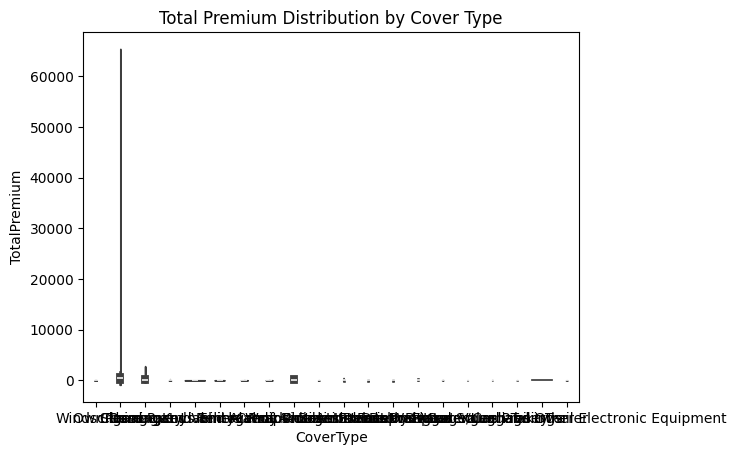

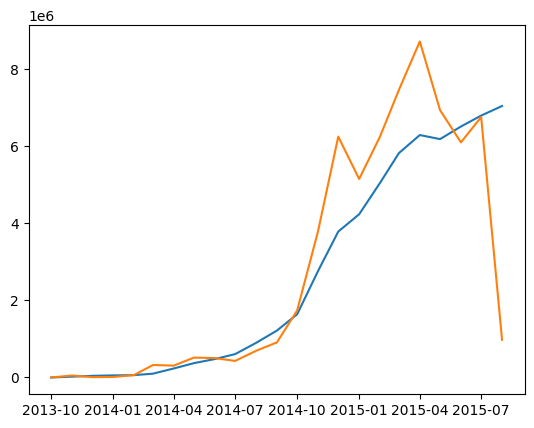

In [27]:
# Example of a creative plot (e.g., a violin plot)
sns.violinplot(x='CoverType', y='TotalPremium', data=df)
plt.title('Total Premium Distribution by Cover Type')
plt.show()

# Another example (e.g., a time series plot)
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
monthly_data = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({'TotalPremium': 'sum', 'TotalClaims': 'sum'}).reset_index()
monthly_data['TransactionMonth'] = monthly_data['TransactionMonth'].dt.to_timestamp()

plt.plot(monthly_data['TransactionMonth'], monthly_data['TotalPremium'], label='Total Premium')
plt.plot(monthly_data['TransactionMonth'], monthly_data['TotalClaims'], label='Total Claims')
